'''
We will be performing
1. Basic EDA 
2. Feature Engineering
3. Applying ML Algorithms
'''

In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
## reading the dataset
df = pd.read_csv('adult.csv')

In [3]:
df.head()  

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()    # statistical overview

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
## basic details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# EDA

In [7]:
## lets check for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

'''
Conclusion - No null values found in the dataset
'''

In [8]:
## lets check unique values in each column
for feature in df.columns:
    print(feature,' -> ',len(df[feature].unique()))

age  ->  73
workclass  ->  9
fnlwgt  ->  21648
education  ->  16
education-num  ->  16
marital-status  ->  7
occupation  ->  15
relationship  ->  6
race  ->  5
sex  ->  2
capital-gain  ->  119
capital-loss  ->  92
hours-per-week  ->  94
country  ->  42
salary  ->  2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
## lets get the numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O']

In [11]:
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [12]:
## lets get the categorical features
categorical_features = [feature for feature in df.columns if feature not in numerical_features]

In [13]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [14]:
# lets reduce some categories from some variables to make visulization smooth
def edit(val):
    
    if (val==' Preschool'):
        return 'Other'
    elif (val==' 1st-4th'):
        return 'Other'
    elif (val==' 5th-6th'):
        return 'Other'
    elif (val==' 7th-8th'):
        return 'Other'
    elif (val==' 9th'):
        return 'Other'
    elif (val==' 10th'):
        return 'Other'
    elif (val==' 11th'):
        return 'Other'
    elif (val==' 12th'):
        return 'Other'
    else:
        return val

In [15]:
df['education']=df['education'].apply(edit)

In [16]:
df['education'].unique()

array([' Bachelors', ' HS-grad', 'Other', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school'],
      dtype=object)

In [17]:
## lets reduce marital status to married and non married
def married(val):
    if val==' Never-married':
        return 'not-married'
    elif val==' Divorced':
        return 'not-married'
    elif val==' Separated':
        return 'not-married'
    elif val==' Widowed':
        return 'not-married'
    else:
        return 'married'

In [18]:
df['marital-status']=df['marital-status'].apply(married)

In [19]:
df['marital-status'].unique()

array(['not-married', 'married'], dtype=object)

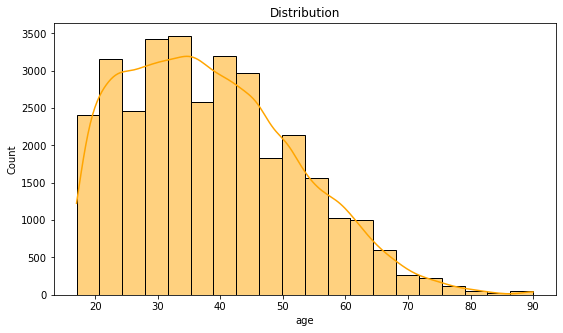

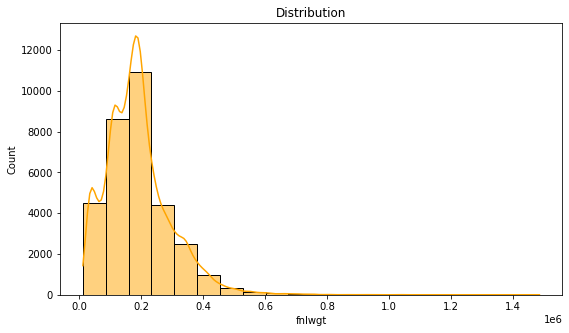

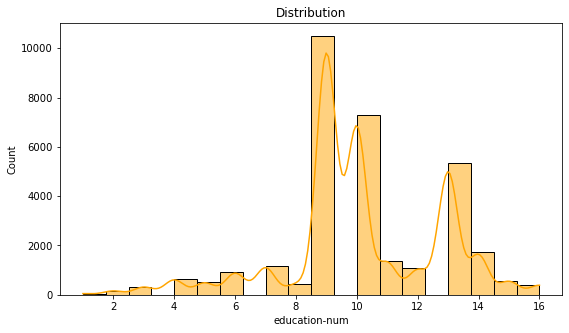

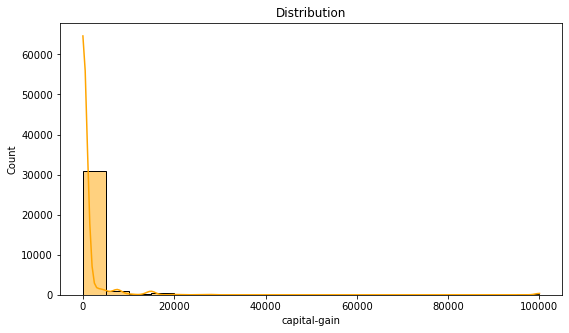

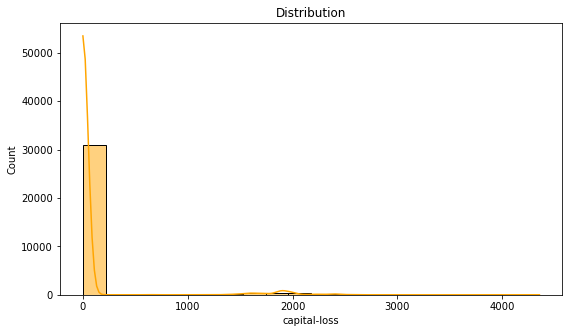

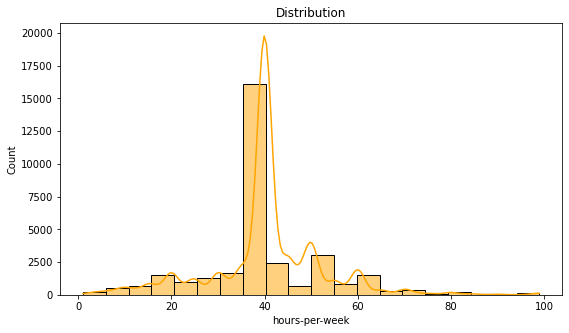

In [20]:
## lets plot for numerical features

for feature in numerical_features:
    plt.figure(figsize=(9,5))
    sns.histplot(df[feature],color='orange',bins=20,kde=True)
    plt.title('Distribution')
    plt.show()

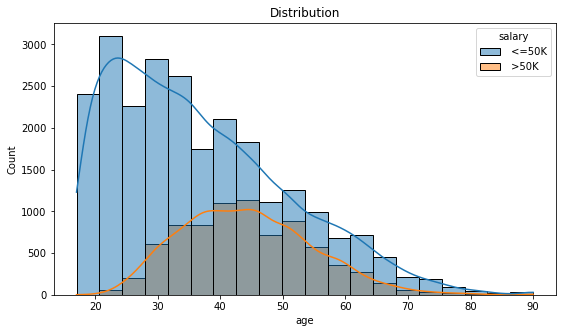

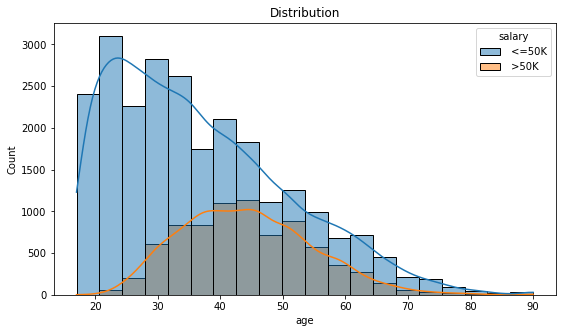

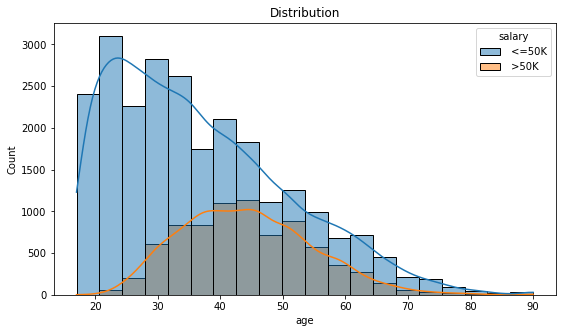

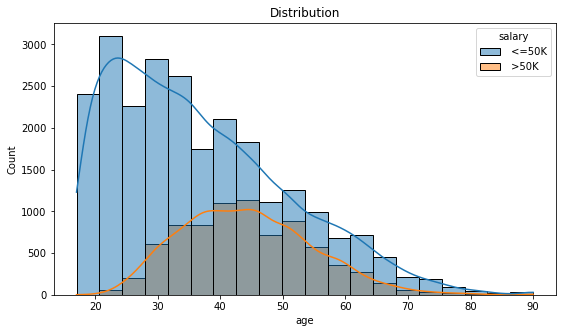

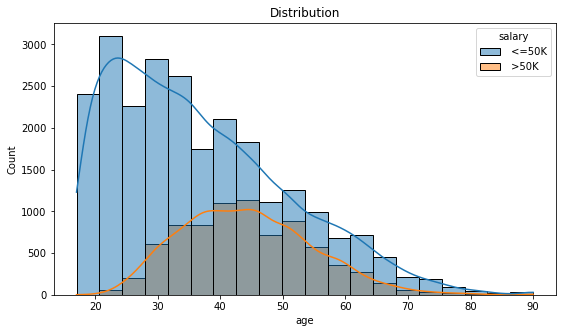

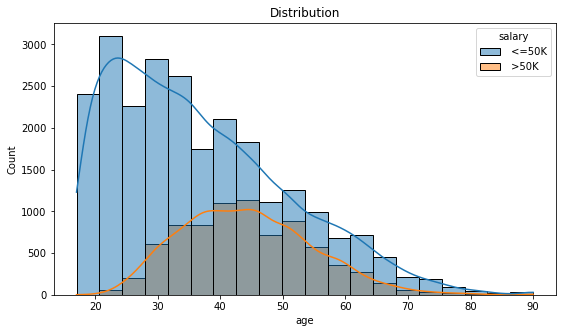

In [21]:
## lets add salary as hue in the previous plots

for feature in numerical_features:
    plt.figure(figsize=(9,5))
    sns.histplot(x=df['age'],hue=df['salary'],color='orange',bins=20,kde=True)
    plt.title('Distribution')
    plt.show()

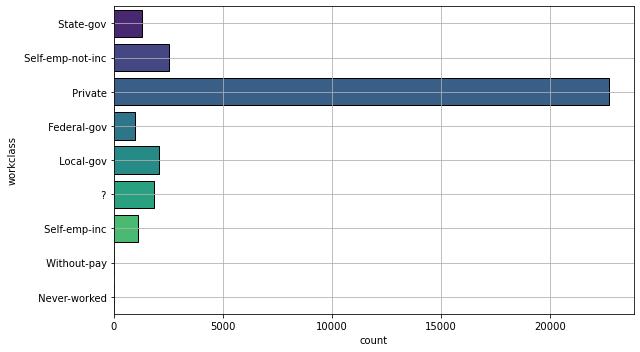

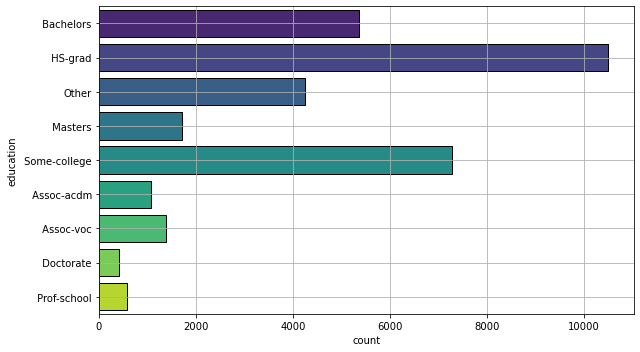

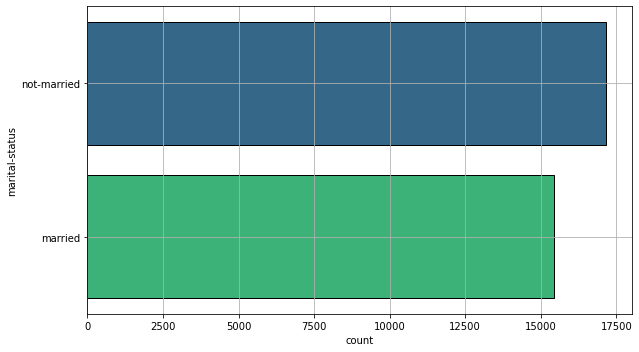

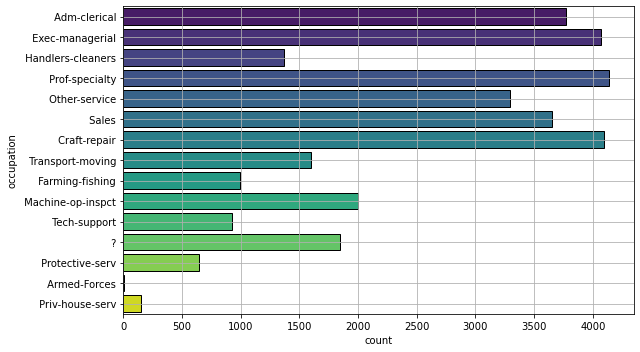

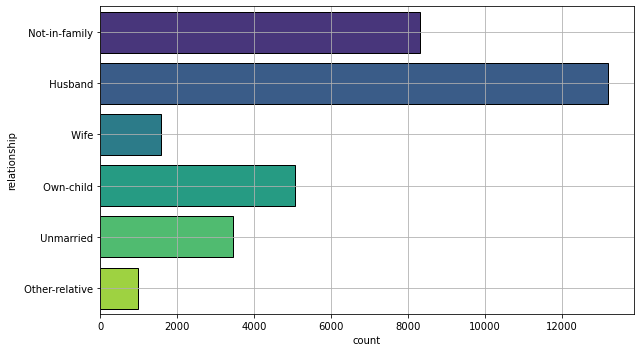

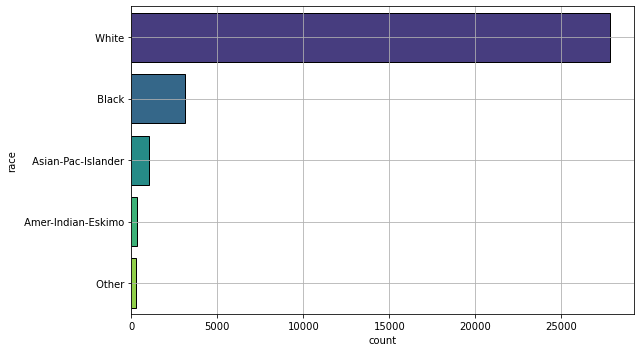

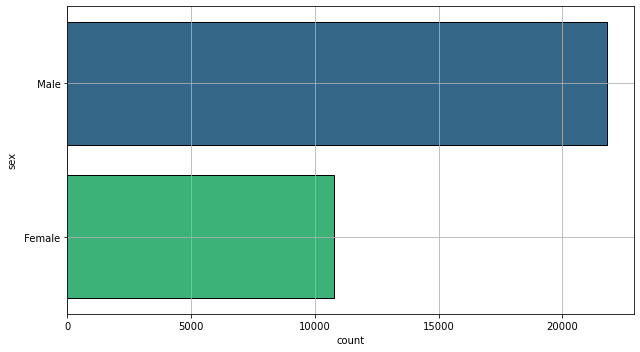

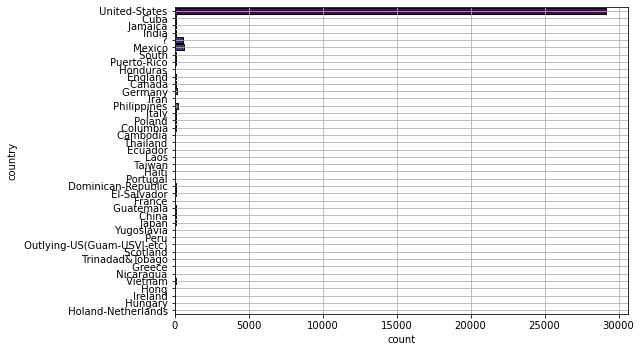

In [22]:
## lets plot for categoriacla variables
categorical_features.remove('salary')
for feature in categorical_features:
    plt.figure(figsize=(9,5))
    sns.countplot(y=df[feature],palette='viridis',saturation=0.9,edgecolor="black")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

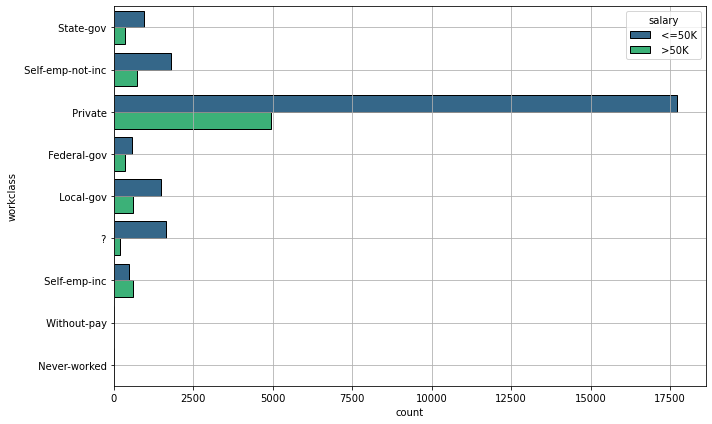

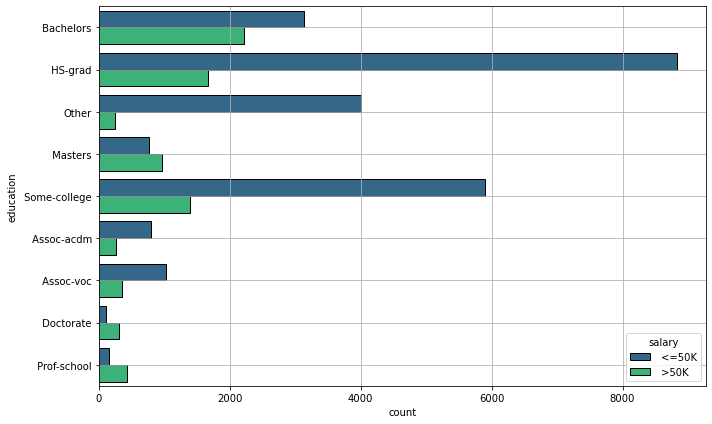

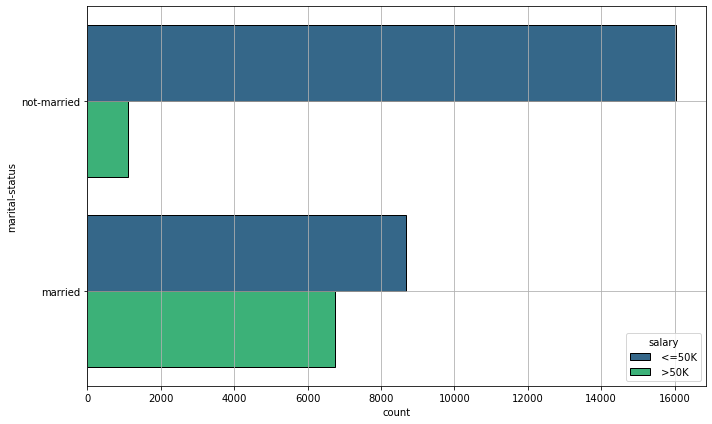

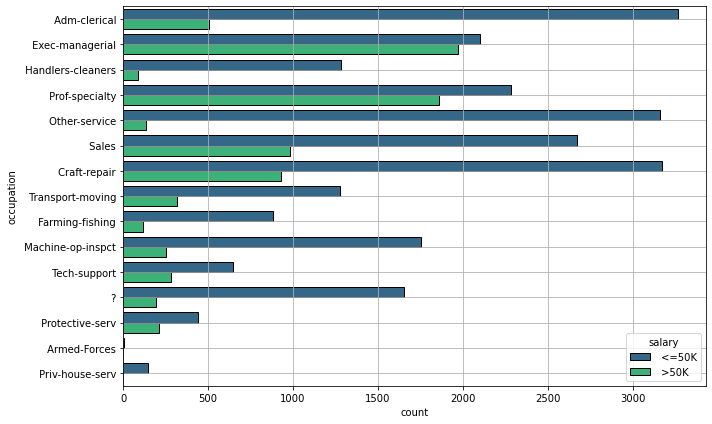

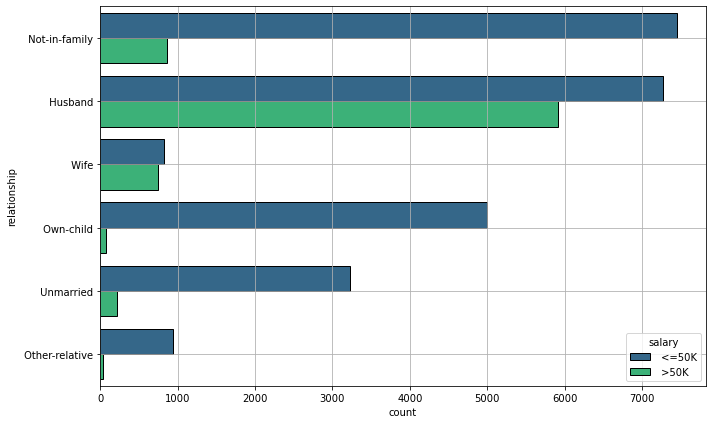

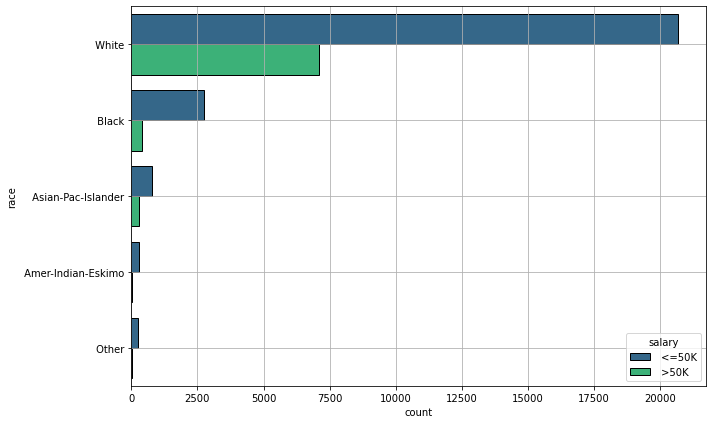

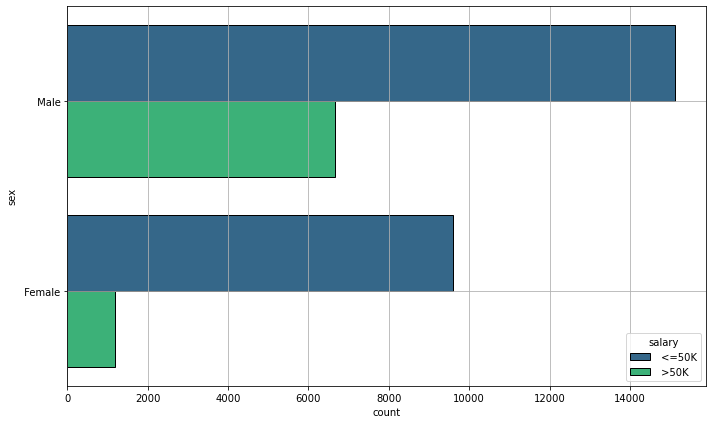

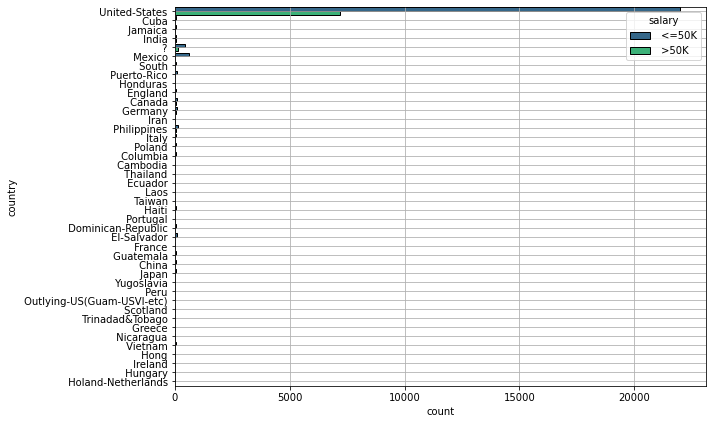

In [23]:
for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(y=df[feature],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Feature Engineering

1. Train test split
2. Label Encoding

In [24]:
X = df.drop(['salary'], axis=1)
y = df['salary']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for feature in categorical_features:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

<ipython-input-26-37df867d6b4e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-26-37df867d6b4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


In [27]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

## Machine Learning Algorithms

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:
lr.score(X_test,y_test)

0.7935143102812923

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='random')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [31]:
dt.score(X_test,y_test)

0.8131679154894976

# Random Forest

In [32]:

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=145, random_state=40,criterion='entropy',max_depth=100)
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=145,
                       random_state=40)

In [33]:
rf.score(X_test,y_test)

0.860950743151947

## KNN 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
knn.score(X_test,y_test)

0.7883552389141383

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [37]:
nb.score(X_test,y_test)

0.8005159071367154

In [38]:
## We got best score of Random Forest
rf_predict = rf.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf_predict)

array([[5795,  419],
       [ 713, 1214]])